In [25]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import re
from datetime import datetime
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [5]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [6]:

df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Scrape_skai.csv") 
df

,Title,Summary,Time
0,Γεννηματά: Το αύριο μετά την πανδημία πρέπει ν...,"«Η κυβέρνηση της Νέας Δημοκρατίας, στη μέση τη...",26/06/2021 - 22:34
1,Χατζηδάκης για εργασιακό νόμο: Μεγάλη μεταρρύθ...,Μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη ...,20/06/2021 - 17:00
2,Χατζηδάκης σε ΣΚΑΪ: Από την επόμενη εβδομάδα σ...,Ήδη από την επόμενη εβδομάδα θα ισχύει η διάτα...,17/06/2021 - 11:18
3,Συνδικαλιστές υπεράνω του νόμου…,Του Βασίλη Χιώτη\r\n\r\nΜια φορά κι έναν καιρό...,17/06/2021 - 11:16
4,Εργασιακό-Χατζηδάκης: Περιμένουμε εξηγήσεις απ...,"«Ο νόμος πλέον, για την προστασία της εργασίας...",16/06/2021 - 22:50
...,...,...,...
85,Δώρο Πάσχα 2021: Πότε καταβάλλεται -Πώς να το ...,Τη Μεγάλη Τετάρτη 28 Απριλίου αναμένεται να κα...,20/04/2021 - 07:59
86,Νέο εργασιακό νομοσχέδιο: Τι ισχύει για απολύσ...,Εξίσωση των εργασιακών δικαιωμάτων για εργατοτ...,20/04/2021 - 07:14
87,"Μητσοτάκης: Όχι πρόωρες εκτιμήσεις, σε συνεργα...","«Βαδίζουμε, όπως όλα δείχνουν, στην τελευταία ...",14/04/2021 - 13:36
88,Επέκταση του επιδόματος 400 ευρώ σε περισσότερ...,Της Ναντίν Χαρδαλιά\r\n\r\nΕπέκταση του επιδόμ...,22/03/2021 - 15:49


In [7]:
df['Time'] = pd.to_datetime(df.Time , format='%d/%m/%Y - %H:%M')
df['Time']
df

,Title,Summary,Time
0,Γεννηματά: Το αύριο μετά την πανδημία πρέπει ν...,"«Η κυβέρνηση της Νέας Δημοκρατίας, στη μέση τη...",2021-06-26 22:34:00
1,Χατζηδάκης για εργασιακό νόμο: Μεγάλη μεταρρύθ...,Μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη ...,2021-06-20 17:00:00
2,Χατζηδάκης σε ΣΚΑΪ: Από την επόμενη εβδομάδα σ...,Ήδη από την επόμενη εβδομάδα θα ισχύει η διάτα...,2021-06-17 11:18:00
3,Συνδικαλιστές υπεράνω του νόμου…,Του Βασίλη Χιώτη\r\n\r\nΜια φορά κι έναν καιρό...,2021-06-17 11:16:00
4,Εργασιακό-Χατζηδάκης: Περιμένουμε εξηγήσεις απ...,"«Ο νόμος πλέον, για την προστασία της εργασίας...",2021-06-16 22:50:00
...,...,...,...
85,Δώρο Πάσχα 2021: Πότε καταβάλλεται -Πώς να το ...,Τη Μεγάλη Τετάρτη 28 Απριλίου αναμένεται να κα...,2021-04-20 07:59:00
86,Νέο εργασιακό νομοσχέδιο: Τι ισχύει για απολύσ...,Εξίσωση των εργασιακών δικαιωμάτων για εργατοτ...,2021-04-20 07:14:00
87,"Μητσοτάκης: Όχι πρόωρες εκτιμήσεις, σε συνεργα...","«Βαδίζουμε, όπως όλα δείχνουν, στην τελευταία ...",2021-04-14 13:36:00
88,Επέκταση του επιδόματος 400 ευρώ σε περισσότερ...,Της Ναντίν Χαρδαλιά\r\n\r\nΕπέκταση του επιδόμ...,2021-03-22 15:49:00


In [8]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df['day'] = pd.DatetimeIndex(df['Time']).day
df

,Title,Summary,Time,year,month,day
0,Γεννηματά: Το αύριο μετά την πανδημία πρέπει ν...,"«Η κυβέρνηση της Νέας Δημοκρατίας, στη μέση τη...",2021-06-26 22:34:00,2021,6,26
1,Χατζηδάκης για εργασιακό νόμο: Μεγάλη μεταρρύθ...,Μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη ...,2021-06-20 17:00:00,2021,6,20
2,Χατζηδάκης σε ΣΚΑΪ: Από την επόμενη εβδομάδα σ...,Ήδη από την επόμενη εβδομάδα θα ισχύει η διάτα...,2021-06-17 11:18:00,2021,6,17
3,Συνδικαλιστές υπεράνω του νόμου…,Του Βασίλη Χιώτη\r\n\r\nΜια φορά κι έναν καιρό...,2021-06-17 11:16:00,2021,6,17
4,Εργασιακό-Χατζηδάκης: Περιμένουμε εξηγήσεις απ...,"«Ο νόμος πλέον, για την προστασία της εργασίας...",2021-06-16 22:50:00,2021,6,16
...,...,...,...,...,...,...
85,Δώρο Πάσχα 2021: Πότε καταβάλλεται -Πώς να το ...,Τη Μεγάλη Τετάρτη 28 Απριλίου αναμένεται να κα...,2021-04-20 07:59:00,2021,4,20
86,Νέο εργασιακό νομοσχέδιο: Τι ισχύει για απολύσ...,Εξίσωση των εργασιακών δικαιωμάτων για εργατοτ...,2021-04-20 07:14:00,2021,4,20
87,"Μητσοτάκης: Όχι πρόωρες εκτιμήσεις, σε συνεργα...","«Βαδίζουμε, όπως όλα δείχνουν, στην τελευταία ...",2021-04-14 13:36:00,2021,4,14
88,Επέκταση του επιδόματος 400 ευρώ σε περισσότερ...,Της Ναντίν Χαρδαλιά\r\n\r\nΕπέκταση του επιδόμ...,2021-03-22 15:49:00,2021,3,22


In [9]:
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

In [10]:
df.dtypes

Title              object
Summary            object
Time       datetime64[ns]
year                int64
month              object
day                 int64
dtype: object

In [11]:
def cleanTxt(text):
  text = re.sub(r'[^\w\s]', '', text)   #Removing puncuations
  text = text.lower()                     #Converting letters to lowercase
  text = text.replace('\xa0','')       #Removing \xa0 character(it means space)  
  text = text.replace('\t','')        #Removing \t character(similar to the indentation function in the document,Tab key) 
  text = text.replace('\n','')
  text = text.replace('\r','')                                                                                             
  #text = re.sub('\d+', '', text)      #Removing numbers             
# Return the cleaned text
  return text
#Clean the tweets
df['Summary'] = df['Summary'].apply(cleanTxt)
df['Title'] =  df['Title'].apply(cleanTxt)
#Show the cleaned tweets
df

,Title,Summary,Time,year,month,day
0,γεννηματά το αύριο μετά την πανδημία πρέπει να...,η κυβέρνηση της νέας δημοκρατίας στη μέση της ...,2021-06-26 22:34:00,2021,Jun,26
1,χατζηδάκης για εργασιακό νόμο μεγάλη μεταρρύθμ...,μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη ...,2021-06-20 17:00:00,2021,Jun,20
2,χατζηδάκης σε σκαϊ από την επόμενη εβδομάδα σε...,ήδη από την επόμενη εβδομάδα θα ισχύει η διάτα...,2021-06-17 11:18:00,2021,Jun,17
3,συνδικαλιστές υπεράνω του νόμου,του βασίλη χιώτημια φορά κι έναν καιρό υπήρχε ...,2021-06-17 11:16:00,2021,Jun,17
4,εργασιακόχατζηδάκης περιμένουμε εξηγήσεις από ...,ο νόμος πλέον για την προστασία της εργασίας ε...,2021-06-16 22:50:00,2021,Jun,16
...,...,...,...,...,...,...
85,δώρο πάσχα 2021 πότε καταβάλλεται πώς να το υπ...,τη μεγάλη τετάρτη 28 απριλίου αναμένεται να κα...,2021-04-20 07:59:00,2021,Apr,20
86,νέο εργασιακό νομοσχέδιο τι ισχύει για απολύσε...,εξίσωση των εργασιακών δικαιωμάτων για εργατοτ...,2021-04-20 07:14:00,2021,Apr,20
87,μητσοτάκης όχι πρόωρες εκτιμήσεις σε συνεργασί...,βαδίζουμε όπως όλα δείχνουν στην τελευταία αλλ...,2021-04-14 13:36:00,2021,Apr,14
88,επέκταση του επιδόματος 400 ευρώ σε περισσότερ...,της ναντίν χαρδαλιάεπέκταση του επιδόματος των...,2021-03-22 15:49:00,2021,Mar,22


In [12]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [13]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [14]:
matrix = vec.fit_transform(df['Summary'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation(προσδοκία) words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']



In [17]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)


df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [18]:
#We don't have NaN values...
df.isnull().values.any()

False

In [19]:
df.set_index('Time' , inplace=True)
df



,Title,Summary,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,,,,
2021-06-26 22:34:00,γεννηματά το αύριο μετά την πανδημία πρέπει να...,η κυβέρνηση της νέας δημοκρατίας στη μέση της ...,2021,Jun,26,0,2,0,1,0,2,0,0,1,1
2021-06-20 17:00:00,χατζηδάκης για εργασιακό νόμο μεγάλη μεταρρύθμ...,μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη ...,2021,Jun,20,2,3,0,0,0,3,0,0,3,2
2021-06-17 11:18:00,χατζηδάκης σε σκαϊ από την επόμενη εβδομάδα σε...,ήδη από την επόμενη εβδομάδα θα ισχύει η διάτα...,2021,Jun,17,3,0,0,2,0,2,1,0,3,1
2021-06-17 11:16:00,συνδικαλιστές υπεράνω του νόμου,του βασίλη χιώτημια φορά κι έναν καιρό υπήρχε ...,2021,Jun,17,0,0,0,0,0,0,0,0,0,0
2021-06-16 22:50:00,εργασιακόχατζηδάκης περιμένουμε εξηγήσεις από ...,ο νόμος πλέον για την προστασία της εργασίας ε...,2021,Jun,16,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 07:59:00,δώρο πάσχα 2021 πότε καταβάλλεται πώς να το υπ...,τη μεγάλη τετάρτη 28 απριλίου αναμένεται να κα...,2021,Apr,20,1,0,0,1,0,0,0,0,1,0
2021-04-20 07:14:00,νέο εργασιακό νομοσχέδιο τι ισχύει για απολύσε...,εξίσωση των εργασιακών δικαιωμάτων για εργατοτ...,2021,Apr,20,0,0,0,0,0,0,0,0,1,0
2021-04-14 13:36:00,μητσοτάκης όχι πρόωρες εκτιμήσεις σε συνεργασί...,βαδίζουμε όπως όλα δείχνουν στην τελευταία αλλ...,2021,Apr,14,0,0,0,0,0,0,0,0,0,0


In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/skai_new_sent.csv' )
df

,Title,Summary,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,,,,
2021-06-26 22:34:00,γεννηματά το αύριο μετά την πανδημία πρέπει να...,η κυβέρνηση της νέας δημοκρατίας στη μέση της ...,2021,Jun,26,0,2,0,1,0,2,0,0,1,1
2021-06-20 17:00:00,χατζηδάκης για εργασιακό νόμο μεγάλη μεταρρύθμ...,μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη ...,2021,Jun,20,2,3,0,0,0,3,0,0,3,2
2021-06-17 11:18:00,χατζηδάκης σε σκαϊ από την επόμενη εβδομάδα σε...,ήδη από την επόμενη εβδομάδα θα ισχύει η διάτα...,2021,Jun,17,3,0,0,2,0,2,1,0,3,1
2021-06-17 11:16:00,συνδικαλιστές υπεράνω του νόμου,του βασίλη χιώτημια φορά κι έναν καιρό υπήρχε ...,2021,Jun,17,0,0,0,0,0,0,0,0,0,0
2021-06-16 22:50:00,εργασιακόχατζηδάκης περιμένουμε εξηγήσεις από ...,ο νόμος πλέον για την προστασία της εργασίας ε...,2021,Jun,16,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 07:59:00,δώρο πάσχα 2021 πότε καταβάλλεται πώς να το υπ...,τη μεγάλη τετάρτη 28 απριλίου αναμένεται να κα...,2021,Apr,20,1,0,0,1,0,0,0,0,1,0
2021-04-20 07:14:00,νέο εργασιακό νομοσχέδιο τι ισχύει για απολύσε...,εξίσωση των εργασιακών δικαιωμάτων για εργατοτ...,2021,Apr,20,0,0,0,0,0,0,0,0,1,0
2021-04-14 13:36:00,μητσοτάκης όχι πρόωρες εκτιμήσεις σε συνεργασί...,βαδίζουμε όπως όλα δείχνουν στην τελευταία αλλ...,2021,Apr,14,0,0,0,0,0,0,0,0,0,0


In [ ]:
ax = df['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'green',label='pos', )
df['negative'].resample('M').sum().plot(figsize=(20,4), ax = ax, color = 'red',label= 'neg')
df['trust'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'blue')
df['anger'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'yellow')
df['fear'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'black').legend()

In [22]:
#Resamle Time Series from daily to weekly (7d)
df_new = df.resample('7d').sum()

df_new

,year,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,
2021-03-21,4042,43,0,1,0,0,0,0,0,0,1,0
2021-03-28,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-04,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-11,2021,14,0,0,0,0,0,0,0,0,0,0
2021-04-18,6063,60,2,1,0,2,1,0,2,1,4,1
2021-04-25,0,0,0,0,0,0,0,0,0,0,0,0
2021-05-02,8084,24,0,4,2,0,1,2,1,1,6,2
2021-05-09,16168,104,3,4,2,3,0,5,3,1,9,1
2021-05-16,8084,66,1,4,3,0,0,2,3,0,5,0


In [27]:
df_new.to_csv('/content/gdrive/My Drive/Colab Notebooks/skai_analysis_final.csv' )

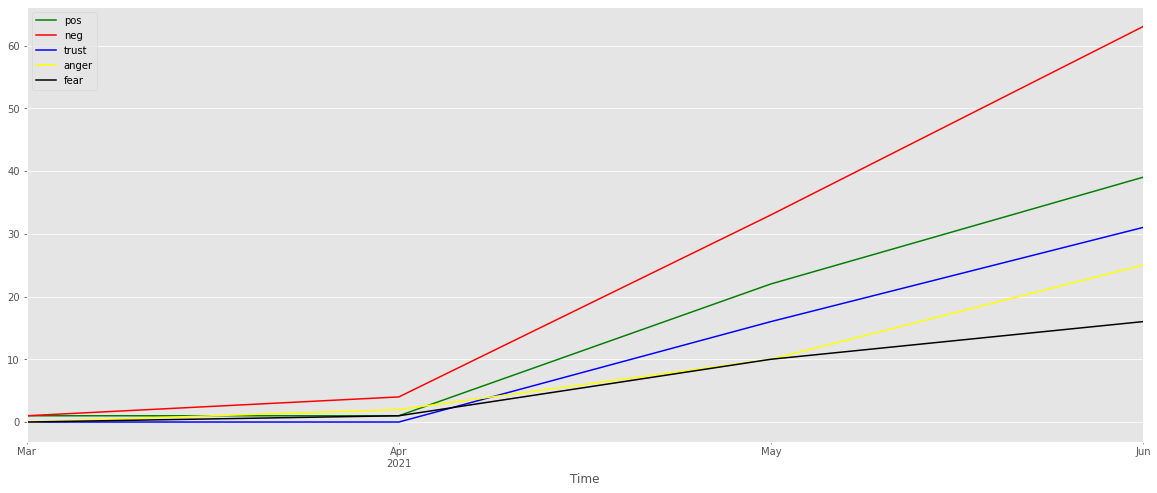

In [25]:
ax = df_new['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'green',label='pos', )
df_new['negative'].resample('M').sum().plot(figsize=(20,4), ax = ax, color = 'red',label= 'neg')
df_new['trust'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'blue')
df_new['anger'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'yellow')
df_new['fear'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'black').legend()